In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/local_Documents/TheoryAndPracticeOfCausalInference`


In [2]:
Pkg.add("Statistics")
using Statistics

    Updating registry at `~/.julia/registries/General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Project.toml`
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Manifest.toml`


## 数値例で理解する最小二乗法

In [3]:
y₁ = [40, 20, 50, 10]

4-element Vector{Int64}:
 40
 20
 50
 10

In [4]:
x₁ = [5, 1, 3, 2]

4-element Vector{Int64}:
 5
 1
 3
 2

In [5]:
ŷ₁ = @. 11.143 + 6.857 * x₁

4-element Vector{Float64}:
 45.428000000000004
 18.0
 31.714000000000002
 24.857

In [6]:
e₁ = y₁ - ŷ₁

4-element Vector{Float64}:
  -5.428000000000004
   2.0
  18.285999999999998
 -14.857

In [7]:
ŷ₂ = @. 10.909 * x₁

4-element Vector{Float64}:
 54.545
 10.909
 32.727000000000004
 21.818

In [8]:
e₂ = y₁ - ŷ₂

4-element Vector{Float64}:
 -14.545000000000002
   9.091
  17.272999999999996
 -11.818000000000001

In [9]:
sum(e₁)

0.0009999999999941167

In [10]:
sum(e₂)

0.0009999999999923403

In [11]:
e₁b = @. e₁^2
e₂b = @. e₂^2
sum(e₁)

0.0009999999999941167

In [12]:
sum(e₂)

0.0009999999999923403

## 種明かし：最小二乗法による切片と傾きの公式

In [13]:
xbar = mean(x₁)

2.75

In [14]:
ybar = mean(y₁)

30.0

In [15]:
hensax = @. x₁ - xbar

4-element Vector{Float64}:
  2.25
 -1.75
  0.25
 -0.75

In [16]:
hensay = @. y₁ - ybar

4-element Vector{Float64}:
  10.0
 -10.0
  20.0
 -20.0

In [17]:
hensaxy = @. hensax * hensay

4-element Vector{Float64}:
 22.5
 17.5
  5.0
 15.0

In [18]:
num = sum(hensaxy)

60.0

In [19]:
hensax² = @. hensax ^ 2
denom = sum(hensax²)

8.75

In [20]:
b₁ = num / denom

6.857142857142857

In [21]:
b₀ = @. ybar - b₁ * xbar 

11.142857142857142

In [22]:
Pkg.add(["GLM", "DataFrames"])
using GLM, DataFrames

   Resolving package versions...
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Project.toml`
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Manifest.toml`


In [23]:
model₁ = glm(@formula(y₁ ~ x₁), DataFrame(y₁ = y₁, x₁ = x₁), Normal(), IdentityLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Normal{Float64}, IdentityLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y₁ ~ 1 + x₁

Coefficients:
───────────────────────────────────────────────────────────────────────
                Coef.  Std. Error     z  Pr(>|z|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  11.1429     18.1085   0.62    0.5383  -24.3492     46.6349
x₁            6.85714     5.79937  1.18    0.2370   -4.50941    18.2237
───────────────────────────────────────────────────────────────────────

In [24]:
coef(model₁)

2-element Vector{Float64}:
 11.142857142857142
  6.857142857142857

In [25]:
# 比推定量
b₁b = ybar / xbar

10.909090909090908

## 条件付き期待値としての回帰モデル

In [26]:
Pkg.add("StatsPlots")
using StatsPlots

   Resolving package versions...
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Project.toml`
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Manifest.toml`


In [27]:
y₁ = collect(1:9)
x₁ = reshape([j for i in 1:3, j in 1:3], (9,))

9-element Vector{Int64}:
 1
 1
 1
 2
 2
 2
 3
 3
 3

In [28]:
model₂ = glm(@formula(y₁ ~ x₁), DataFrame(y₁ = y₁, x₁ = x₁), Normal(), IdentityLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Normal{Float64}, IdentityLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y₁ ~ 1 + x₁

Coefficients:
─────────────────────────────────────────────────────────────────────
             Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────
(Intercept)   -1.0    0.816497  -1.22    0.2207    -2.6003   0.600304
x₁             3.0    0.377964   7.94    <1e-14     2.2592   3.7408
─────────────────────────────────────────────────────────────────────

In [29]:
Pkg.add("StatsPlots")
using StatsPlots

   Resolving package versions...
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Project.toml`
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Manifest.toml`


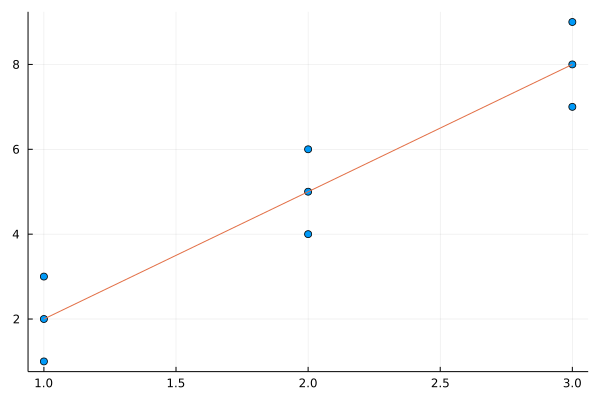

In [30]:
scatter(x₁, y₁, label = "")
plot!(x₁, predict(model₂, DataFrame(x₁ = x₁)), label = "")

In [31]:
# 説明変数xの値ごとの条件付き期待値を計算
mean(y₁[x₁ .== 1])

2.0

In [32]:
mean(y₁[x₁ .== 2])

5.0

In [33]:
mean(y₁[x₁ .== 3])

8.0

### 最小二乗法による切片と傾きの公式

モンテカルロシミュレーションの結果のみ再現しておく。

In [34]:
x₁ = [5, 1, 3, 2]
y₁ = [40, 20, 50, 10]
model₃ = glm(@formula(y₁ ~ x₁), DataFrame(x₁ = x₁, y₁ = y₁), Normal(), IdentityLink())
bOLS = coef(model₃)[2]

6.857142857142857

In [35]:
ussOLS = sum((predict(model₃, DataFrame(x₁ = x₁, y₁ = y₁)) .- y₁) .^ 2) # 残差平方和

588.5714285714286

In [36]:
Pkg.add(["Distributions", "Random"])
using Distributions, Random

   Resolving package versions...
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Project.toml`
  No Changes to `~/local_Documents/TheoryAndPracticeOfCausalInference/Manifest.toml`


In [37]:
function MC1(T::Int64, y₁, x₁)
    b₁ = Vector{Real}(undef, T)
    uss = similar(b₁)
    a₁ = 11.14286
    for t in 1:1:T
        b₁[t] = rand(Uniform(-10, 25), 1)[1]
        ŷ = @. a₁ + b₁[t] * x₁
        uss[t] = sum((y₁ - ŷ) .^ 2)
    end
    return b₁, uss
end

MC1 (generic function with 1 method)

In [38]:
b₁, uss = MC1(10_000, y₁, x₁)

(Real[4.747722124673359, 19.39605200228465, -6.908333711941383, 17.055606663384815, -6.293814042893098, 3.1479772007920257, 20.988328397874294, 3.0839397016873846, 11.6025557920063, -2.4602027215724735  …  -0.27533404824904295, -8.082590787781763, -2.9995148671670666, 9.017616724552653, -9.690941984487944, 20.106965778162134, -5.728479629028021, -4.784362088248165, 0.27545983641638117, 20.402581584439147], Real[762.107873215615, 6720.317676186165, 7978.616025099216, 4644.909965899618, 7333.529630017413, 1125.129680207753, 8376.498103493923, 1143.8166114399178, 1466.8105398269613, 3974.2750596047777  …  2572.5878256763453, 9293.200503372904, 4377.5651672838585, 770.6098103113407, 11268.29575351276, 7435.326751513818, 6766.088478687181, 5874.031555168703, 2277.9945188931197, 7744.249782281626])

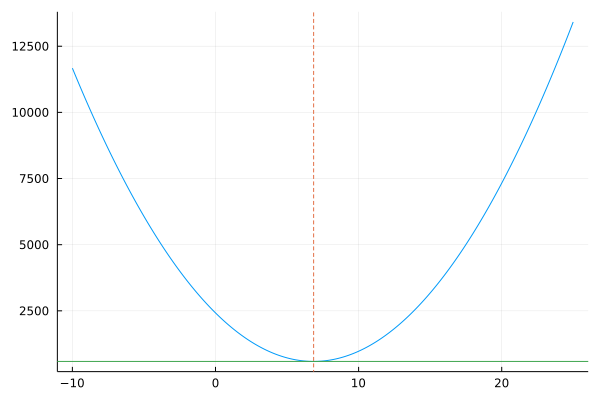

In [39]:
plot(b₁, uss, label = "", seriestype = :line)
vline!([bOLS], label = "", linestyle = :dash)
hline!([ussOLS], label = "")